In [36]:
#Load data using pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils_early_disease import view_cut_patient

In [2]:
path = "./cases_controls/cases_controls_20250402_094611.csv"
df = pd.read_csv(path)

In [77]:
path = "./cases_controls/cases_controls_20250402_115858.csv"
df_3 = pd.read_csv(path)

In [79]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdCliente                924 non-null    int64  
 1   IAH                      924 non-null    float64
 2   Sexo                     924 non-null    object 
 3   Cantidad_Atenciones      924 non-null    float64
 4   fecha_poli               924 non-null    object 
 5   label_apnea              924 non-null    float64
 6   edad_poli                924 non-null    int64  
 7   last_appointment         924 non-null    object 
 8   prediction_window_start  924 non-null    object 
 9   end_observation_window   924 non-null    object 
 10  num_app_included         924 non-null    int64  
 11  total_app                924 non-null    int64  
 12  lista_consultas          924 non-null    object 
 13  lista_recorte            924 non-null    object 
dtypes: float64(3), int64(4), o

In [78]:
df_3["label_apnea"].value_counts()

label_apnea
1.0    732
0.0    192
Name: count, dtype: int64

In [80]:
def view_cut_patient_v2(data, id_patient):
    sample_data = data.loc[data["IdCliente"] == id_patient]    
    fecha_poli = sample_data["fecha_poli"].iloc[0] 
    fecha_menos_seis_meses = sample_data["prediction_window_start"].iloc[0]
    lista_consultas = sample_data["lista_consultas"].iloc[0]
    lista_consultas = lista_consultas.split(",")    
    lista_recorte = sample_data["lista_recorte"].iloc[0]
    lista_recorte = lista_recorte.split(",")
       
    return fecha_poli, fecha_menos_seis_meses, lista_consultas, lista_recorte

In [86]:
id_patient = 7039
data = df_3
fecha_poli, fecha_menos_seis_meses, lista_consultas, lista_recorte = view_cut_patient_v2(data, id_patient)
print("id_patient: {}".format(id_patient))
print("diagnosis date {}".format(fecha_poli))
print("prediction window start: {}".format(fecha_menos_seis_meses))
#print(lista_consultas)
print("dates to include as the observation window:")
for i in lista_recorte:
    print(i)
print("all consulting dates of the patient")
for i in lista_consultas:
    print(i)

id_patient: 7039
diagnosis date 2018-07-15
prediction window start: 2018-01-16
dates to include as the observation window:
[Timestamp('2017-11-30 08:26:49')
 Timestamp('2017-12-12 14:27:44')]
all consulting dates of the patient
[Timestamp('2005-11-24 12:17:54')
 Timestamp('2005-12-02 11:36:27')
 Timestamp('2005-12-14 17:47:55')
 Timestamp('2005-12-23 12:13:47')
 Timestamp('2005-12-23 12:44:26')
 Timestamp('2010-11-04 20:40:15')
 Timestamp('2010-11-05 07:43:05')
 Timestamp('2010-11-05 07:59:16')
 Timestamp('2010-11-05 09:27:48')
 Timestamp('2010-11-05 09:32:43')
 Timestamp('2010-11-05 10:29:32')
 Timestamp('2010-11-05 14:26:14')
 Timestamp('2010-11-06 06:48:15')
 Timestamp('2010-11-06 10:46:42')
 Timestamp('2011-02-08 11:36:23')
 Timestamp('2011-02-28 10:26:55')
 Timestamp('2011-03-19 11:42:12')
 Timestamp('2011-03-19 14:02:14')
 Timestamp('2011-03-19 14:43:29')
 Timestamp('2011-03-19 21:29:05')
 Timestamp('2011-03-20 00:37:10')
 Timestamp('2011-03-20 07:22:06')
 Timestamp('2011-03-20 0

In [82]:
df_3.head()

,IdCliente,IAH,Sexo,Cantidad_Atenciones,fecha_poli,label_apnea,edad_poli,last_appointment,prediction_window_start,end_observation_window,num_app_included,total_app,lista_consultas,lista_recorte
0,1619,9.0,F,40.0,2015-05-26,1.0,83,2017-12-05 08:45:15,2014-11-27,2014-02-11 13:18:54,12,97,"[Timestamp('2014-02-11 13:18:54'), Timestamp('...","[Timestamp('2014-02-11 13:18:54'), Timestamp('..."
1,5256,12.0,M,102.0,2018-12-14,1.0,82,2020-01-28 15:51:27,2018-06-17,2016-07-21 13:03:48,26,159,"[Timestamp('2010-05-05 12:07:22'), Timestamp('...","[Timestamp('2016-07-21 13:03:48'), Timestamp('..."
2,7039,108.0,F,25.0,2018-07-15,1.0,71,2019-11-29 14:52:45,2018-01-16,2017-11-30 08:26:49,2,125,"[Timestamp('2005-11-24 12:17:54'), Timestamp('...","[Timestamp('2017-11-30 08:26:49'), Timestamp('..."
3,9669,6.0,F,13.0,2015-05-25,1.0,56,2016-04-11 11:41:49,2014-11-26,2013-05-08 08:33:21,13,26,"[Timestamp('2009-01-22 21:18:11'), Timestamp('...","[Timestamp('2013-05-08 08:33:21'), Timestamp('..."
4,10915,6.0,F,14.0,2014-08-15,1.0,41,2016-10-11 15:51:50,2014-02-16,2012-05-17 11:00:05,5,60,"[Timestamp('2006-09-06 18:57:17'), Timestamp('...","[Timestamp('2012-05-17 11:00:05'), Timestamp('..."


In [83]:
df_3["num_app_included"].describe()

count    924.000000
mean      18.330087
std       38.435723
min        1.000000
25%        2.000000
50%        5.000000
75%       19.000000
max      432.000000
Name: num_app_included, dtype: float64

In [84]:
df_3[df_3["num_app_included"] >= 1000]

,IdCliente,IAH,Sexo,Cantidad_Atenciones,fecha_poli,label_apnea,edad_poli,last_appointment,prediction_window_start,end_observation_window,num_app_included,total_app,lista_consultas,lista_recorte


In [85]:
#ES RECORTAR EN PERIODO DE DOS AÑOS
df_4 = df_3[df_3["num_app_included"] < 100]
df_4["num_app_included"].describe()

count    893.000000
mean      12.501680
std       16.769382
min        1.000000
25%        2.000000
50%        5.000000
75%       17.000000
max       99.000000
Name: num_app_included, dtype: float64

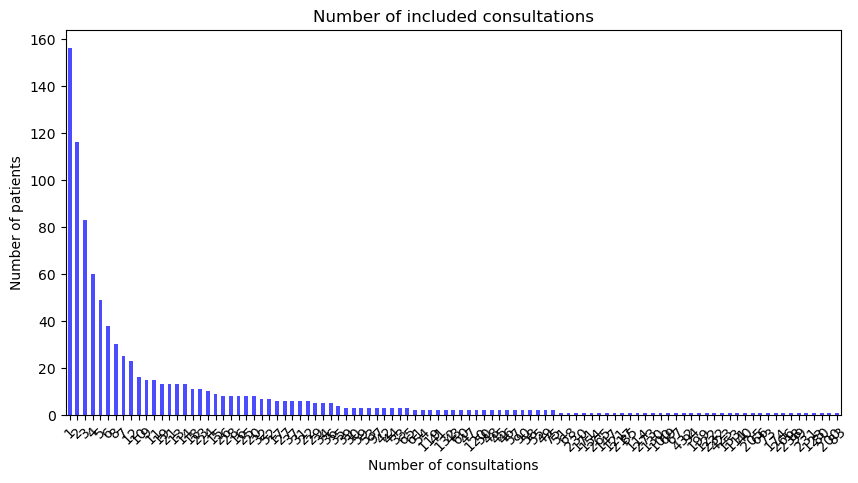

In [87]:
df_3["num_app_included"].value_counts().plot(kind="bar", figsize=(10, 5), color="blue", alpha=0.7)
plt.title("Number of included consultations")
plt.xlabel("Number of consultations")
plt.ylabel("Number of patients")
plt.xticks(rotation=45)
plt.show()

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparative_graphs(df, column_to_split, column_to_plot, title1, title2):
    """
    Esta función separa un DataFrame según los valores únicos de una columna y genera dos gráficos comparativos,
    mostrando los valores sobre las barras.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        column_to_split (str): La columna según la cual se separará el DataFrame.
        column_to_plot (str): La columna que se graficará.
        title1 (str): Título del primer gráfico.
        title2 (str): Título del segundo gráfico.
    """
    # Obtener los valores únicos de la columna para dividir el DataFrame
    unique_values = df[column_to_split].unique()
    
    if len(unique_values) < 2:
        print("La columna para dividir debe tener al menos dos valores únicos.")
        return
    
    # Separar el DataFrame en dos subconjuntos
    df_1 = df[df[column_to_split] == unique_values[0]]
    df_2 = df[df[column_to_split] == unique_values[1]]
    
    # Crear los gráficos
    plt.figure(figsize=(14, 6))
    
    # Primer gráfico
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=column_to_plot, data=df_1)
    plt.title(title1)
    plt.xlabel(column_to_plot)
    plt.ylabel("Count")
    # Agregar valores a las barras
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Segundo gráfico
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x=column_to_plot, data=df_2)
    plt.title(title2)
    plt.xlabel(column_to_plot)
    plt.ylabel("Count")
    # Agregar valores a las barras
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

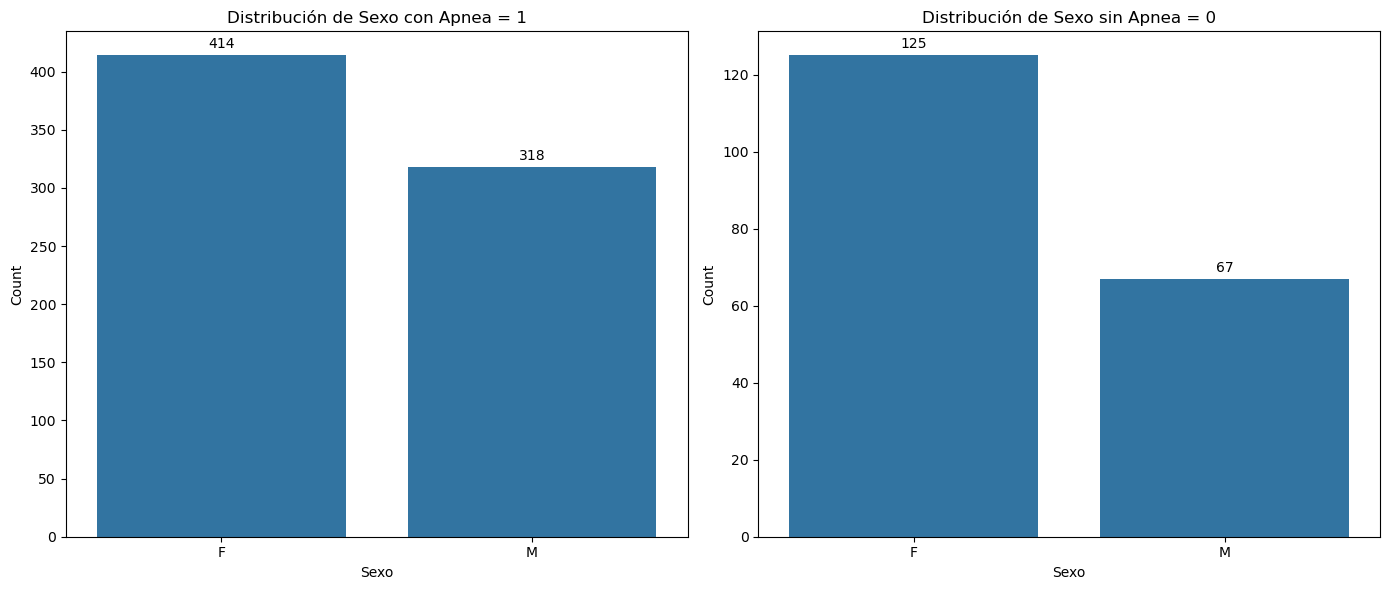

In [89]:
plot_comparative_graphs(
    df_3,
    column_to_split="label_apnea",
    column_to_plot="Sexo",
    title1="Distribución de Sexo con Apnea = 1",
    title2="Distribución de Sexo sin Apnea = 0"
)

In [ ]:
#TODO: Agregar el peso

In [90]:
def plot_comparative_graphs_with_bins(df, column_to_split, column_to_plot, bins, title1, title2):
    """
    Esta función separa un DataFrame según los valores únicos de una columna, agrupa los valores continuos
    en intervalos (bins) y genera dos gráficos comparativos.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        column_to_split (str): La columna según la cual se separará el DataFrame.
        column_to_plot (str): La columna continua que se graficará.
        bins (int): Número de intervalos (bins) para agrupar los valores continuos.
        title1 (str): Título del primer gráfico.
        title2 (str): Título del segundo gráfico.
    """
    # Obtener los valores únicos de la columna para dividir el DataFrame
    unique_values = df[column_to_split].unique()
    
    if len(unique_values) < 2:
        print("La columna para dividir debe tener al menos dos valores únicos.")
        return
    
    # Separar el DataFrame en dos subconjuntos
    df_1 = df[df[column_to_split] == unique_values[0]]
    df_2 = df[df[column_to_split] == unique_values[1]]
    
    # Crear una nueva columna con los intervalos (bins) para la columna continua
    df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
    df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)
    
    # Crear los gráficos
    plt.figure(figsize=(14, 6))
    
    # Primer gráfico
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x='binned', data=df_1, order=sorted(df_1['binned'].unique()))
    plt.title(title1)
    plt.xlabel(f"{column_to_plot} (agrupado)")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    # Agregar valores a las barras
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Segundo gráfico
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x='binned', data=df_2, order=sorted(df_2['binned'].unique()))
    plt.title(title2)
    plt.xlabel(f"{column_to_plot} (agrupado)")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    # Agregar valores a las barras
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_15200/2354860469.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
/tmp/ipykernel_15200/2354860469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)


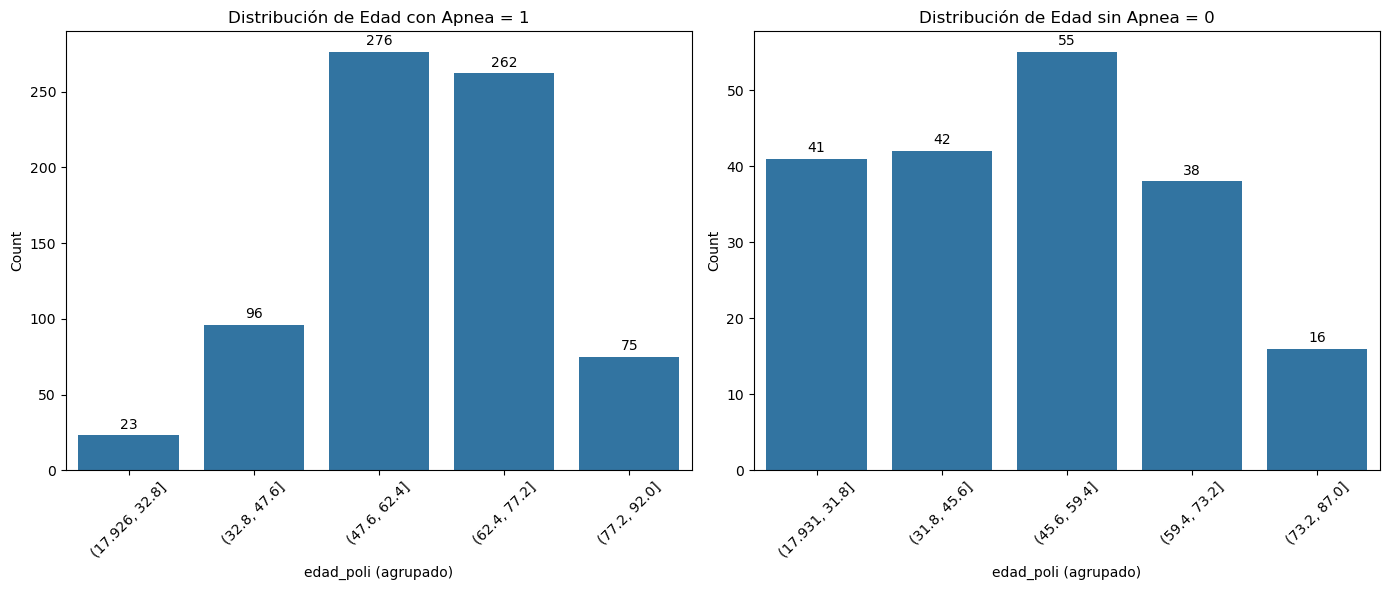

In [91]:
plot_comparative_graphs_with_bins(
    df_3,
    column_to_split="label_apnea",
    column_to_plot="edad_poli",
    bins=5,  # Número de intervalos
    title1="Distribución de Edad con Apnea = 1",
    title2="Distribución de Edad sin Apnea = 0"
)

/tmp/ipykernel_15200/2354860469.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
/tmp/ipykernel_15200/2354860469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)


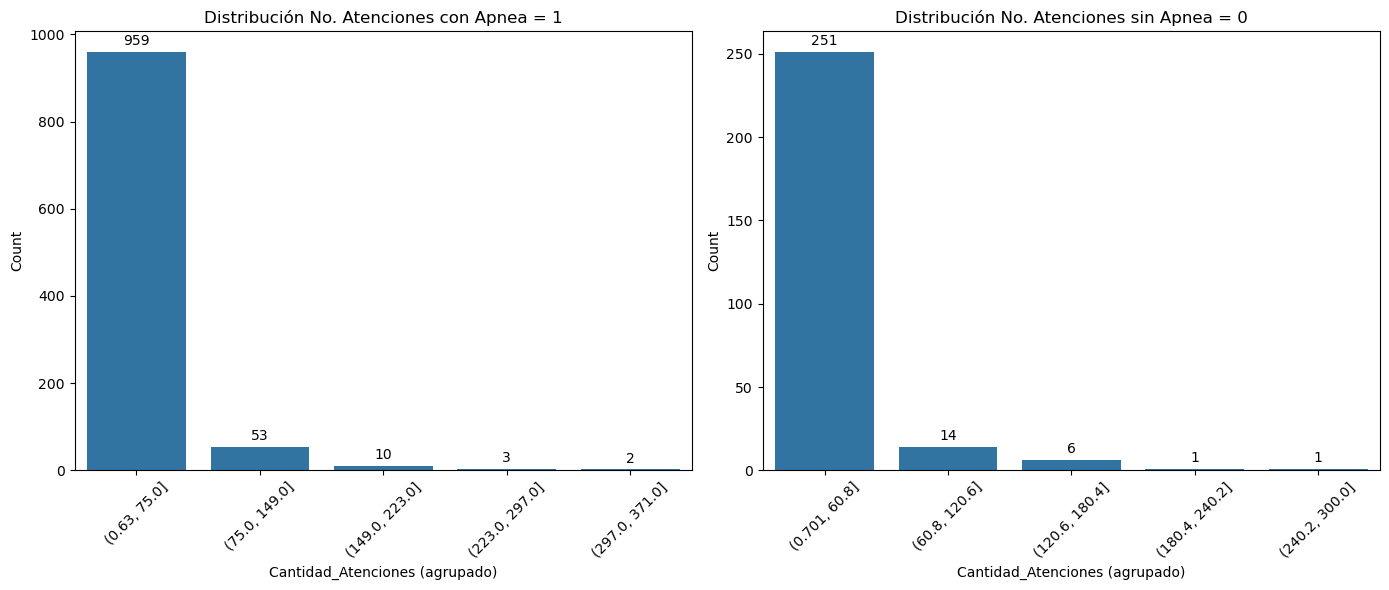

In [15]:
plot_comparative_graphs_with_bins(
    df,
    column_to_split="label_apnea",
    column_to_plot="Cantidad_Atenciones",
    bins=5,  # Número de intervalos
    title1="Distribución No. Atenciones con Apnea = 1",
    title2="Distribución No. Atenciones sin Apnea = 0"
)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdCliente                1300 non-null   int64  
 1   IAH                      1300 non-null   float64
 2   Sexo                     1300 non-null   object 
 3   Cantidad_Atenciones      1300 non-null   float64
 4   fecha_poli               1300 non-null   object 
 5   label_apnea              1300 non-null   float64
 6   edad_poli                1300 non-null   int64  
 7   prediction_window_start  1300 non-null   object 
 8   diag_predict             1300 non-null   int64  
 9   diag_total               1300 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 101.7+ KB


/tmp/ipykernel_15200/2354860469.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
/tmp/ipykernel_15200/2354860469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)


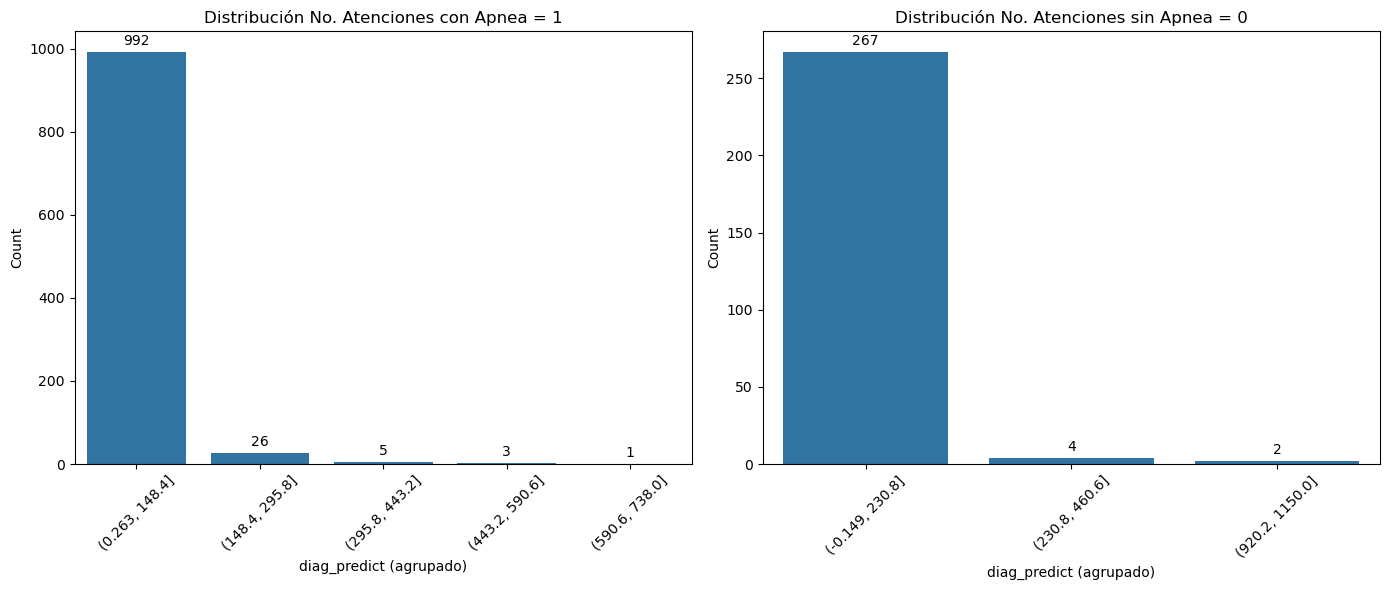

In [17]:
plot_comparative_graphs_with_bins(
    df,
    column_to_split="label_apnea",
    column_to_plot="diag_predict",
    bins=5,  # Número de intervalos
    title1="Distribución No. Atenciones con Apnea = 1",
    title2="Distribución No. Atenciones sin Apnea = 0"
)